In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
import os.path
from bs4 import BeautifulSoup
import requests
import wfdb

In [2]:
record_segment_good_length_path = '../../../2_data/'

In [3]:
!ls -l $record_segment_good_length_path

total 30936
-rw-r--r--   1 tarus  staff   286811 Feb  3 23:19 record_segment_good_length_0_1774.csv
-rw-r--r--   1 tarus  staff  2546376 Feb  5 00:23 record_segment_good_length_0_8858.csv
-rw-r--r--   1 tarus  staff  3084991 Feb  5 05:24 record_segment_good_length_0_9999.csv
-rw-r--r--   1 tarus  staff  3511872 Feb  7 20:31 record_segment_good_length_10000_16999.csv
-rw-r--r--   1 tarus  staff  3752840 Feb  7 10:16 record_segment_good_length_10000_22316.csv
-rw-r--r--   1 tarus  staff  2638552 Feb  6 15:31 record_segment_good_length_17000_22316.csv
drwxr-xr-x  14 tarus  staff      448 Feb  3 20:05 xold_01
drwxr-xr-x   6 tarus  staff      192 Feb  5 15:16 y_backup


In [4]:
path_1 = record_segment_good_length_path + 'record_segment_good_length_0_9999.csv'
path_2 = record_segment_good_length_path + 'record_segment_good_length_10000_16999.csv'
path_3 = record_segment_good_length_path + 'record_segment_good_length_17000_22316.csv'

In [5]:
df1 = pd.read_csv(path_1, header=None)
df2 = pd.read_csv(path_2, header=None)
df3 = pd.read_csv(path_3, header=None)

In [6]:
df1.head()

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [7]:
print('df1: {}, df2: {}, df3: {}'.format(df1.shape, df2.shape, df3.shape))

df1: (56154, 3), df2: (62712, 3), df3: (47117, 3)


In [8]:
t1 = df1.head()
t2 = df2.head()
t3 = df3.head()

In [9]:
print(t1)

   0                                     1             2
0  4  p00/p000052/p000052-2191-01-10-02-21  3238451_0005
1  5  p00/p000052/p000052-2191-01-10-12-15  3533390_0001
2  5  p00/p000052/p000052-2191-01-10-12-15  3533390_0003
3  5  p00/p000052/p000052-2191-01-10-12-15  3533390_0004
4  5  p00/p000052/p000052-2191-01-10-12-15  3533390_0007


In [10]:
print(t2)

       0                                     1             2
0  10000  p04/p049022/p049022-2160-12-03-23-50  3198728_0003
1  10000  p04/p049022/p049022-2160-12-03-23-50  3198728_0005
2  10000  p04/p049022/p049022-2160-12-03-23-50  3198728_0007
3  10001  p04/p049023/p049023-2179-09-03-21-42  3708030_0002
4  10001  p04/p049023/p049023-2179-09-03-21-42  3708030_0005


In [11]:
print(t3)

       0                                     1             2
0  17000  p07/p077697/p077697-2107-07-26-20-06  3792554_0002
1  17000  p07/p077697/p077697-2107-07-26-20-06  3792554_0004
2  17000  p07/p077697/p077697-2107-07-26-20-06  3792554_0010
3  17000  p07/p077697/p077697-2107-07-26-20-06  3792554_0012
4  17001  p07/p077697/p077697-2107-07-28-19-01  3273137_0006


In [12]:
t = pd.concat([t1,t2], axis=0).reset_index()

In [13]:
t

,index,0,1,2
0,0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
5,0,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0003
6,1,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0005
7,2,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0007
8,3,10001,p04/p049023/p049023-2179-09-03-21-42,3708030_0002
9,4,10001,p04/p049023/p049023-2179-09-03-21-42,3708030_0005


In [14]:
t.drop('index', axis=1, inplace=True)

In [15]:
t

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
5,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0003
6,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0005
7,10000,p04/p049022/p049022-2160-12-03-23-50,3198728_0007
8,10001,p04/p049023/p049023-2179-09-03-21-42,3708030_0002
9,10001,p04/p049023/p049023-2179-09-03-21-42,3708030_0005


In [16]:
# del df

In [17]:
df = pd.concat([df1,df2], axis=0)

In [18]:
df

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
...,...,...,...
62707,16999,p07/p077691/p077691-2176-02-01-18-57,3369085_0014
62708,16999,p07/p077691/p077691-2176-02-01-18-57,3369085_0017
62709,16999,p07/p077691/p077691-2176-02-01-18-57,3369085_0019
62710,16999,p07/p077691/p077691-2176-02-01-18-57,3369085_0022


In [19]:
df = pd.concat([df, df3], axis=0)

In [20]:
df

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
...,...,...,...
47112,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0035
47113,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0037
47114,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0039
47115,22316,p09/p099999/p099999-2117-12-31-19-07,3772060_0001


In [21]:
df.reset_index(inplace=True)

In [22]:
df

,index,0,1,2
0,0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
...,...,...,...,...
165978,47112,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0035
165979,47113,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0037
165980,47114,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0039
165981,47115,22316,p09/p099999/p099999-2117-12-31-19-07,3772060_0001


In [23]:
df.drop('index', axis=1, inplace=True)

In [24]:
df

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007
...,...,...,...
165978,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0035
165979,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0037
165980,22315,p09/p099992/p099992-2144-07-25-20-39,3301572_0039
165981,22316,p09/p099999/p099999-2117-12-31-19-07,3772060_0001


In [25]:
directory = [y[0] + '/' + y[1] + '/' for y in [x.split('/') for x in df.iloc[:,1]]]
#directory

In [26]:
matched_record = [y[2] for y in [x.split('/') for x in df.iloc[:,1]]]
#matched_record

In [27]:
user_id = [int(y[1][1:]) for y in [x.split('/') for x in df.iloc[:,1]]]
#user_id

In [28]:
df.insert(loc=1, column='directory', value=directory)

In [29]:
df.head()

,0,directory,1,2
0,4,p00/p000052/,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [30]:
df.insert(loc=2, column='matched_record', value=matched_record)

In [31]:
df.head()

,0,directory,matched_record,1,2
0,4,p00/p000052/,p000052-2191-01-10-02-21,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/,p000052-2191-01-10-12-15,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [32]:
df.insert(loc=1, column='user_id', value=user_id)

In [33]:
df[[0,1,2]].head()

,0,1,2
0,4,p00/p000052/p000052-2191-01-10-02-21,3238451_0005
1,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0001
2,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0003
3,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0004
4,5,p00/p000052/p000052-2191-01-10-12-15,3533390_0007


In [34]:
# drop columns withe name 0 and 1 (as integers)
df.drop([0,1], axis=1, inplace=True)

In [35]:
df.head()

,user_id,directory,matched_record,2
0,52,p00/p000052/,p000052-2191-01-10-02-21,3238451_0005
1,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0001
2,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0003
3,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0004
4,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0007


In [36]:
df.columns = ['user_id', 'directory', 'matched_record', 'record_segment']

In [37]:
df.head()

,user_id,directory,matched_record,record_segment
0,52,p00/p000052/,p000052-2191-01-10-02-21,3238451_0005
1,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0001
2,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0003
3,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0004
4,52,p00/p000052/,p000052-2191-01-10-12-15,3533390_0007


In [38]:
df_selections = df.groupby(df.loc[:,'matched_record'],as_index=False).agg(list)

In [39]:
df_selections

,matched_record,user_id,directory,record_segment
0,p000052-2191-01-10-02-21,[52],[p00/p000052/],[3238451_0005]
1,p000052-2191-01-10-12-15,"[52, 52, 52, 52, 52, 52, 52, 52, 52]","[p00/p000052/, p00/p000052/, p00/p000052/, p00...","[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,p000107-2121-11-30-20-03,"[107, 107, 107, 107, 107, 107, 107, 107, 107, ...","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,p000107-2122-05-14-21-01,"[107, 107, 107, 107, 107, 107, 107, 107, 107, ...","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,p000107-2123-07-26-03-10,"[107, 107, 107, 107, 107, 107, 107]","[p00/p000107/, p00/p000107/, p00/p000107/, p00...","[3746356_0006, 3746356_0008, 3746356_0012, 374..."
...,...,...,...,...
13555,p099982-2157-01-06-16-31,"[99982, 99982, 99982, 99982, 99982, 99982, 999...","[p09/p099982/, p09/p099982/, p09/p099982/, p09...","[3917821_0009, 3917821_0012, 3917821_0013, 391..."
13556,p099982-2157-02-16-17-37,"[99982, 99982, 99982]","[p09/p099982/, p09/p099982/, p09/p099982/]","[3919253_0002, 3919253_0004, 3919253_0006]"
13557,p099983-2193-04-26-12-01,"[99983, 99983, 99983, 99983, 99983]","[p09/p099983/, p09/p099983/, p09/p099983/, p09...","[3757366_0004, 3757366_0006, 3757366_0007, 375..."
13558,p099992-2144-07-25-20-39,"[99992, 99992, 99992, 99992, 99992, 99992, 999...","[p09/p099992/, p09/p099992/, p09/p099992/, p09...","[3301572_0005, 3301572_0007, 3301572_0024, 330..."


In [40]:
df_selections['user_id'] = [x[0] for x in df_selections['user_id']]

In [41]:
df_selections['directory'] = [x[0] for x in df_selections['directory']]

In [42]:
df_selections

,matched_record,user_id,directory,record_segment
0,p000052-2191-01-10-02-21,52,p00/p000052/,[3238451_0005]
1,p000052-2191-01-10-12-15,52,p00/p000052/,"[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,p000107-2121-11-30-20-03,107,p00/p000107/,"[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,p000107-2122-05-14-21-01,107,p00/p000107/,"[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,p000107-2123-07-26-03-10,107,p00/p000107/,"[3746356_0006, 3746356_0008, 3746356_0012, 374..."
...,...,...,...,...
13555,p099982-2157-01-06-16-31,99982,p09/p099982/,"[3917821_0009, 3917821_0012, 3917821_0013, 391..."
13556,p099982-2157-02-16-17-37,99982,p09/p099982/,"[3919253_0002, 3919253_0004, 3919253_0006]"
13557,p099983-2193-04-26-12-01,99983,p09/p099983/,"[3757366_0004, 3757366_0006, 3757366_0007, 375..."
13558,p099992-2144-07-25-20-39,99992,p09/p099992/,"[3301572_0005, 3301572_0007, 3301572_0024, 330..."


In [43]:
len(df_selections['user_id'].unique())

6988

In [44]:
df_selections.head(10)

,matched_record,user_id,directory,record_segment
0,p000052-2191-01-10-02-21,52,p00/p000052/,[3238451_0005]
1,p000052-2191-01-10-12-15,52,p00/p000052/,"[3533390_0001, 3533390_0003, 3533390_0004, 353..."
2,p000107-2121-11-30-20-03,107,p00/p000107/,"[3805787_0005, 3805787_0008, 3805787_0011, 380..."
3,p000107-2122-05-14-21-01,107,p00/p000107/,"[3860035_0001, 3860035_0004, 3860035_0006, 386..."
4,p000107-2123-07-26-03-10,107,p00/p000107/,"[3746356_0006, 3746356_0008, 3746356_0012, 374..."
5,p000109-2141-10-21-02-00,109,p00/p000109/,"[3034224_0006, 3034224_0008, 3034224_0010, 303..."
6,p000109-2142-01-14-18-53,109,p00/p000109/,"[3407610_0004, 3407610_0006, 3407610_0009, 340..."
7,p000109-2142-01-14-18-57,109,p00/p000109/,"[3943625_0004, 3943625_0006, 3943625_0009, 394..."
8,p000109-2142-01-18-10-43,109,p00/p000109/,"[3002540_0001, 3002540_0004]"
9,p000109-2142-01-18-16-05,109,p00/p000109/,[3924895_0003]


In [54]:
directory = df_selections['directory'][0]
directory

'p00/p000052/'

In [55]:
record_inspected = df_selections['record_segment'][0][0]
record_inspected

'3238451_0005'

In [56]:
record_signal = wfdb.rdsamp(record_name=record_inspected,
                                    pn_dir='mimic3wdb-matched/1.0/' + directory,
                                    channel_names=['PLETH'])

In [57]:
record_signal

(array([[0.52492669],
        [0.514174  ],
        [0.49755621],
        ...,
        [0.4056696 ],
        [0.38807429],
        [0.3714565 ]]),
 {'fs': 125,
  'sig_len': 3869120,
  'n_sig': 1,
  'base_date': None,
  'base_time': datetime.time(2, 21, 42, 248000),
  'units': ['NU'],
  'sig_name': ['PLETH'],
  'comments': []})

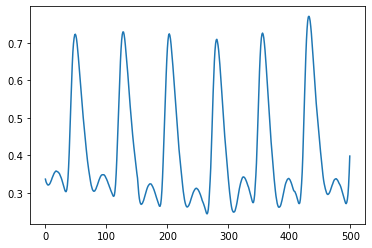

In [58]:
# Plotting the signal
plt.figure()
plt.plot(record_signal[0][6500:7000])
plt.show() 

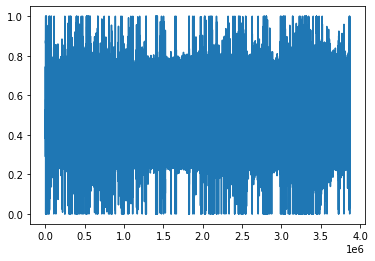

In [60]:
index_directory = 0
index_segment = 0
directory = df_selections['directory'][index_directory]
record_inspected = df_selections['record_segment'][index_directory][index_segment]
record_signal = wfdb.rdsamp(record_name=record_inspected,
                                    pn_dir='mimic3wdb-matched/1.0/' + directory,
                                    channel_names=['PLETH'])
# Plotting the signal
plt.figure()
plt.plot(record_signal[0]) #[6500:7000])
plt.show() 